# Preparation, Reward and Motivation

In this notebook you'll find some R-code that can be used to analyze the data that we have collected. Referring to the lecture in week 4, I will show you how to get insight into phenomena I-VI.

My advice is to initially choose just one of these phenomena to focus on, and try to construct a model that fits with this effect. Then, you can start to build from there and focus on different aspects of the data to focus on. 

Tip: if you save your model output to a CSV, that is structured in exactly the same way as the 'real' data, you can simply run my code for your analysis, and compare the outcomes. 

In [17]:
## Here, I'm loading the packages that are used in the analysis
## if you don't have them yet, you can install them with install.packages("name")

library(plyr)
library(dplyr)
library(ggplot2)
library(magrittr)
library(knitr)

library(lme4)
library(lmerTest)

# The function 'plottab()' takes data from different subjects, and computes averages across conditions.
# It also computes within-subject Confidence intervals, which give you 
# an idea of the variability of the data patterns across participants
# This helpers.R file defines that function, so we load it here
source('helpers.R')

### function to change plot size in jupytR
fig <- function(width, heigth){
    options(repr.plot.width = width, repr.plot.height = heigth)
}

## finally: load the data:
all_dat <- read.csv('real_data.csv')

In [18]:
all_dat %>% head() # quick view of what is in the dataset

,X,jatosStudyResultId,sub_id,studentnumber,Block_nr,ITI,practice,foreperiod,reward,target_visibility,⋯,FP,fp_1,fp_2,fp_3,fp_4,fp_5,RT,invRT,outlier,good_sub
,<int>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<lgl>
1,1,181910,pp181910,s5337712,0,638,yes,900,yes,hi,⋯,900,NA,NA,NA,NA,NA,790,0.001265823,yes,TRUE
2,2,181910,pp181910,s5337712,0,700,yes,900,yes,hi,⋯,900,0.9,NA,NA,NA,NA,353,0.002832861,no,TRUE
3,3,181910,pp181910,s5337712,0,624,yes,600,yes,hi,⋯,600,0.9,0.9,NA,NA,NA,401,0.002493766,no,TRUE
4,4,181910,pp181910,s5337712,0,594,yes,600,yes,hi,⋯,600,0.6,0.9,0.9,NA,NA,376,0.002659574,no,TRUE
5,5,181910,pp181910,s5337712,0,520,yes,300,yes,hi,⋯,300,0.6,0.6,0.9,0.9,NA,518,0.001930502,yes,TRUE
6,6,181910,pp181910,s5337712,0,514,yes,900,yes,hi,⋯,900,0.3,0.6,0.6,0.9,0.9,288,0.003472222,no,TRUE


## I) & II) The effect of 'visibility' and 'reward' on RT

Here, as a first step, we look at the pattern of results when it comes to RT. We'll compute averages and plot it, and then input these data into a linear mixed effects model. 

One thing to note is that in this type of task, it is common to fit the data to 1/RT; This is because LMM's have the assumption that the residuals of the model follow a normal distribution. For RT, this is not the case, but for 1/RT, it comes quite close.

Your ACT-R models probably won't produce RTs that follow the same distribution. Therefore, if your grand average RTs match closely with the plot but  the coefficients of the LMM only match qualitatively, that is not necessary a cause of concern. 

`summarise()` has grouped output by 'sub_id', 'fp', 'reward'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'group', 'fp', 'reward'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'fp', 'reward'. You can override using the
`.groups` argument.


fp,reward,target_visibility,RT,lower,upper
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
0.3,no,hi,321.7085,319.2126,324.2045
0.3,no,lo,340.6334,337.9005,343.3664
0.3,yes,hi,310.0601,307.6068,312.5135
0.3,yes,lo,331.3025,328.6927,333.9123
0.6,no,hi,302.6372,300.8747,304.3998
0.6,no,lo,325.4308,323.4785,327.3831
0.6,yes,hi,291.6746,289.4741,293.8752
0.6,yes,lo,315.8623,313.6802,318.0445
0.9,no,hi,297.4719,295.3617,299.5822


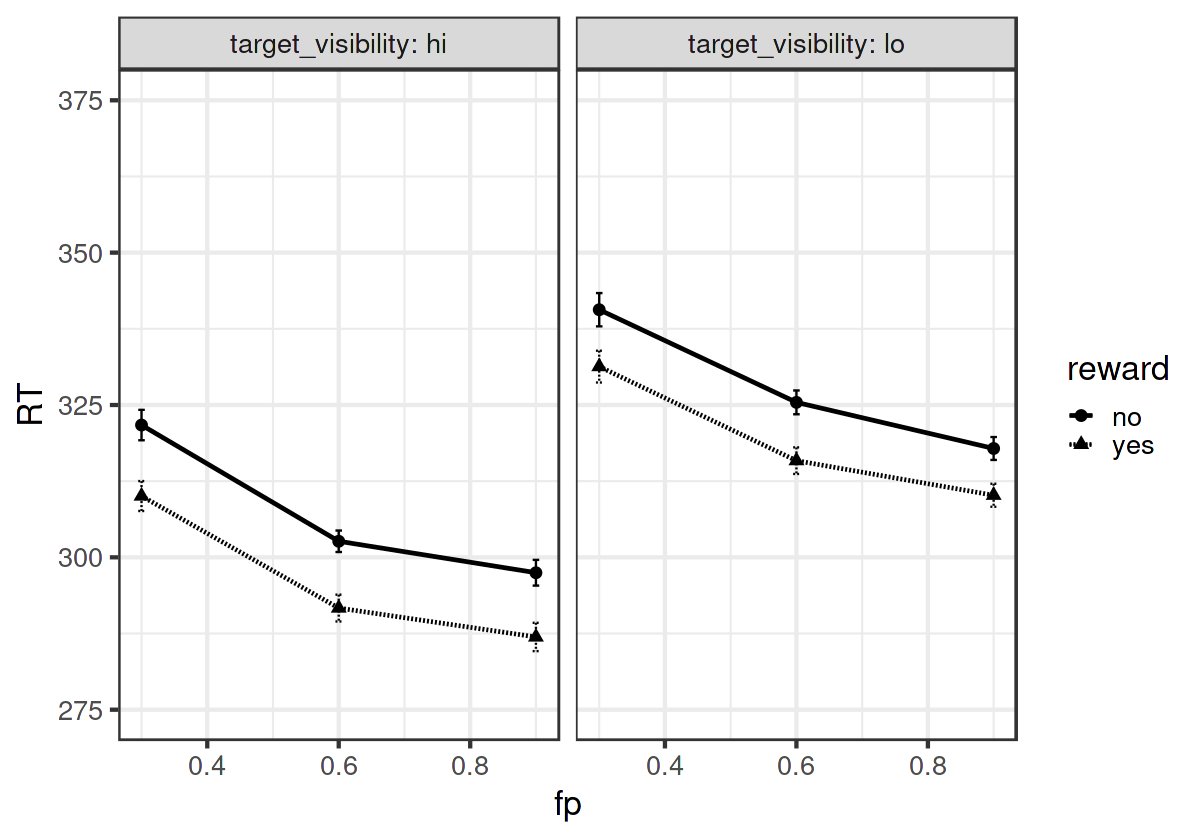

In [22]:
## make a plot:
#### Plot and analyze the effect of FP X reward X visibility
gave <- all_dat  %>% 
    filter(exp_completed==TRUE)  %>%                            # don't test pp's who didn't finish
	filter(correct=='yes',practice=='no',outlier=='no')  %>%    # Only correct, non-practice, non-outlier trials
	group_by(sub_id, fp, reward, target_visibility)  %>%        # Compute average RT per pp, per condition:
	summarize(RT = mean(response_time))  %>% 
	plottab(gv=c('fp','reward','target_visibility'),
            dv='RT', group='sub_id')                            # compute grand avg. w/ plottab()
gave

# now plot it with ggplot
gave %>%
	ggplot(aes(x=fp, y=RT, linetype=reward,shape=reward)) +     # ...and plot
		geom_errorbar(aes(ymin=lower,ymax=upper), color='black',size=.5, width=.01) + 
		geom_line(size=1) + 
		geom_point(size=3) + 
		facet_grid(.~target_visibility, labeller='label_both') + 
		theme_bw(base_size=20) + 
		ylim(275, 375) -> plot_I

fig(10,7)
plot_I



In [24]:
#### run an lmer model:
dd <- all_dat  %>% filter(exp_completed==TRUE)  %>% 
	filter(correct=='yes',practice=='no',outlier=='no')
mod <- lmer(1/response_time ~ fp*reward*target_visibility + (1+fp|sub_id), data=dd)
summary(mod)
anova(mod)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 1/response_time ~ fp * reward * target_visibility + (1 + fp |  
    sub_id)
   Data: dd

REML criterion at convergence: -350163.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8270 -0.5987  0.0180  0.6352  4.3187 

Random effects:
 Groups   Name        Variance  Std.Dev.  Corr 
 sub_id   (Intercept) 1.408e-07 0.0003753      
          fp          3.445e-08 0.0001856 -0.13
 Residual             1.656e-07 0.0004070      
Number of obs: 27457, groups:  sub_id, 59

Fixed effects:
                                   Estimate Std. Error         df t value
(Intercept)                       3.118e-03  5.055e-05  6.419e+01  61.682
fp                                4.160e-04  3.140e-05  1.201e+02  13.247
rewardyes                         9.393e-05  1.831e-05  2.733e+04   5.129
target_visibilitylo              -1.753e-04  1.843e-05  2.733e+04  -9.511
fp:rewardyes                      1.

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
fp,3.582964e-05,3.582964e-05,1,57.90888,216.33763373,3.255105e-21
reward,7.967815e-06,7.967815e-06,1,27334.37438,48.10928646,4.120857e-12
target_visibility,3.159896e-05,3.159896e-05,1,27333.78002,190.79302359,2.983074e-43
fp:reward,4.483425e-09,4.483425e-09,1,27334.95504,0.02707070,8.693138e-01
fp:target_visibility,2.622041e-06,2.622041e-06,1,27333.86362,15.83175749,6.940925e-05
reward:target_visibility,1.524026e-08,1.524026e-08,1,27333.84289,0.09201998,7.616270e-01
fp:reward:target_visibility,8.318039e-08,8.318039e-08,1,27334.05069,0.50223925,4.785239e-01


To summarize: what you see in the results here, is that 
 * With a higher FP, you have a faster RT
 * With a high visibility, you have a faster RT
 * In blocks with a reward, you have a faster RT.
 
To add to that (this is point II)
 * There is a fp x visibility interaction; The preparation curve is a bit steeper when visibility is High, and a bit less steep when it is Low

## Effects on accuracy

These effects are a bit more subtle, so note that they might be tricky to model quantitatively. I suggest you start with qualitatively matching this pattern. 

`summarise()` has grouped output by 'sub_id', 'fp', 'reward'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'group', 'fp', 'reward'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'fp', 'reward'. You can override using the
`.groups` argument.


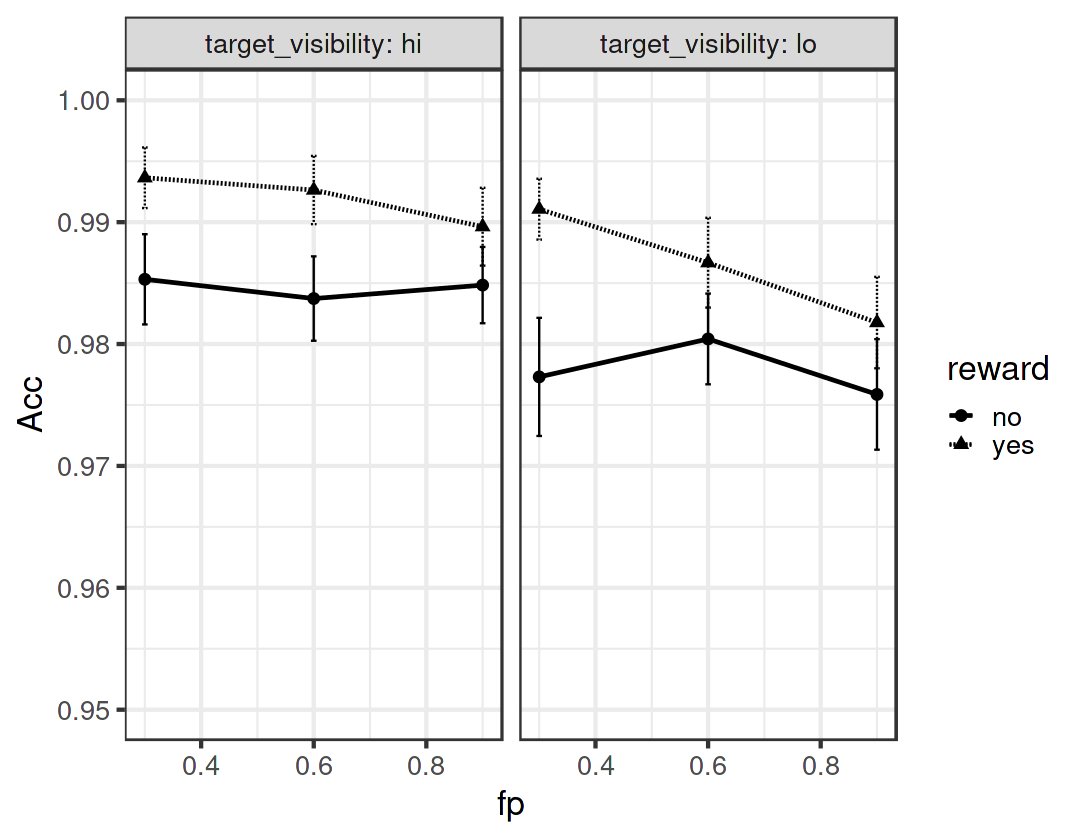

In [31]:
fig(9,7)

### Any effects on Accuracy?
all_dat  %>% filter(exp_completed==TRUE)  %>% 
	filter(practice=='no',outlier=='no')  %>% 
	group_by(sub_id, fp, reward, target_visibility)  %>% 
	summarize(Acc = mean(correct=='yes'))  %>% 
	plottab(gv=c('fp','reward','target_visibility'), dv='Acc', group='sub_id')  %>% 
	ggplot(aes(x=fp, y=Acc, linetype=reward,shape=reward)) + 
		geom_errorbar(aes(ymin=lower,ymax=upper), color='black',size=.5, width=.01) + 
		geom_line(size=1) + 
		geom_point(size=3) + 
		facet_grid(.~target_visibility, labeller='label_both') + 
		theme_bw(base_size=20) + 
		ylim(0.95, 1.0)

The overall pattern of this is that, apart from the main effects (better when rewarded, better when more visible), there seems to be a dropoff in performance as a function of FP, which is particularly the case when trials is rewarded. It looks like this is especially pronounced for the low-visibility condition, but there is no statistical evidence that this is the case. 
The statistical model here is a *GLMER* with a logistic link function. Essentially, this model tries to predict the _probability_ of being correct.

In [35]:
#### run a Glmer model (running these models takes a while...)
dd <- all_dat  %>% filter(exp_completed==TRUE)  %>% 
	filter(practice=='no',outlier=='no')  %>%       # N.B.: correct/incorrect trials are both in there now!
	mutate(bincorrect = as.numeric(correct=='yes')) # make it 1s and zeros

mod <- glmer(bincorrect ~ fp*reward*target_visibility + (1|sub_id), data=dd, 
		family=binomial(link='logit'), na.action='na.fail')
mod.main <- glmer(bincorrect ~ fp+reward+target_visibility + (1|sub_id), data=dd, 
		family=binomial(link='logit'), na.action='na.fail')
mod.2 <- glmer(bincorrect ~ fp*reward+target_visibility + (1|sub_id), data=dd, 
		family=binomial(link='logit'), na.action='na.fail')

summary(mod)
anova(mod,mod.main,mod.2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: bincorrect ~ fp * reward * target_visibility + (1 | sub_id)
   Data: dd

     AIC      BIC   logLik deviance df.resid 
  4096.8   4170.9  -2039.4   4078.8    27856 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-21.6882   0.0805   0.1041   0.1361   0.2775 

Random effects:
 Groups Name        Variance Std.Dev.
 sub_id (Intercept) 0.5587   0.7474  
Number of obs: 27865, groups:  sub_id, 59

Fixed effects:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       4.45832    0.27543  16.187   <2e-16 ***
fp                               -0.06635    0.39099  -0.170   0.8653    
rewardyes                         1.15669    0.45353   2.550   0.0108 *  
target_visibilitylo              -0.34963    0.33360  -1.048   0.2946    
fp:rewardyes                     -0.79098    0.66918  -1.182   0.2372 

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod.main,5,4094.887,4136.063,-2042.444,4084.887,NA,NA,NA
mod.2,6,4091.579,4140.990,-2039.790,4079.579,5.3078036,1,0.0212301
mod,9,4096.772,4170.888,-2039.386,4078.772,0.8077892,3,0.8476031


The analysis is this time done by means of model comparisons. These show that `mod.2` is a better model than `mod.main`, suggesting that the `fp x reward` interaction is 'real'. `mod` is the full model, with a three way interaction. However, there is no evidence that this 3-way interaction is there.

## IV) The effects of the past trial, in different types of blocks

This analysis is run in a very similar way to the overall RT analysis presented above:



`summarise()` has grouped output by 'sub_id', 'fp', 'fp_1', 'reward'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'group', 'fp', 'fp_1', 'reward'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'fp', 'fp_1', 'reward'. You can override
using the `.groups` argument.


    fp fp_1 reward target_visibility       RT    lower    upper
1  0.3  0.3     no                hi 310.4907 307.7846 313.1967
2  0.3  0.3     no                lo 326.0190 323.5633 328.4747
3  0.3  0.3    yes                hi 299.1734 296.4207 301.9260
4  0.3  0.3    yes                lo 321.3383 318.2963 324.3803
5  0.3  0.6     no                hi 323.7227 319.8374 327.6081
6  0.3  0.6     no                lo 337.3515 334.3648 340.3381
7  0.3  0.6    yes                hi 310.5848 308.0182 313.1514
8  0.3  0.6    yes                lo 331.0599 327.9441 334.1758
9  0.3  0.9     no                hi 329.8565 326.7231 332.9898
10 0.3  0.9     no                lo 356.2572 351.2217 361.2926
11 0.3  0.9    yes                hi 319.2828 315.5887 322.9768
12 0.3  0.9    yes                lo 340.1571 336.3252 343.9890
13 0.6  0.3     no                hi 296.7550 294.2845 299.2255
14 0.6  0.3     no                lo 319.2186 316.8937 321.5434
15 0.6  0.3    yes                hi 287

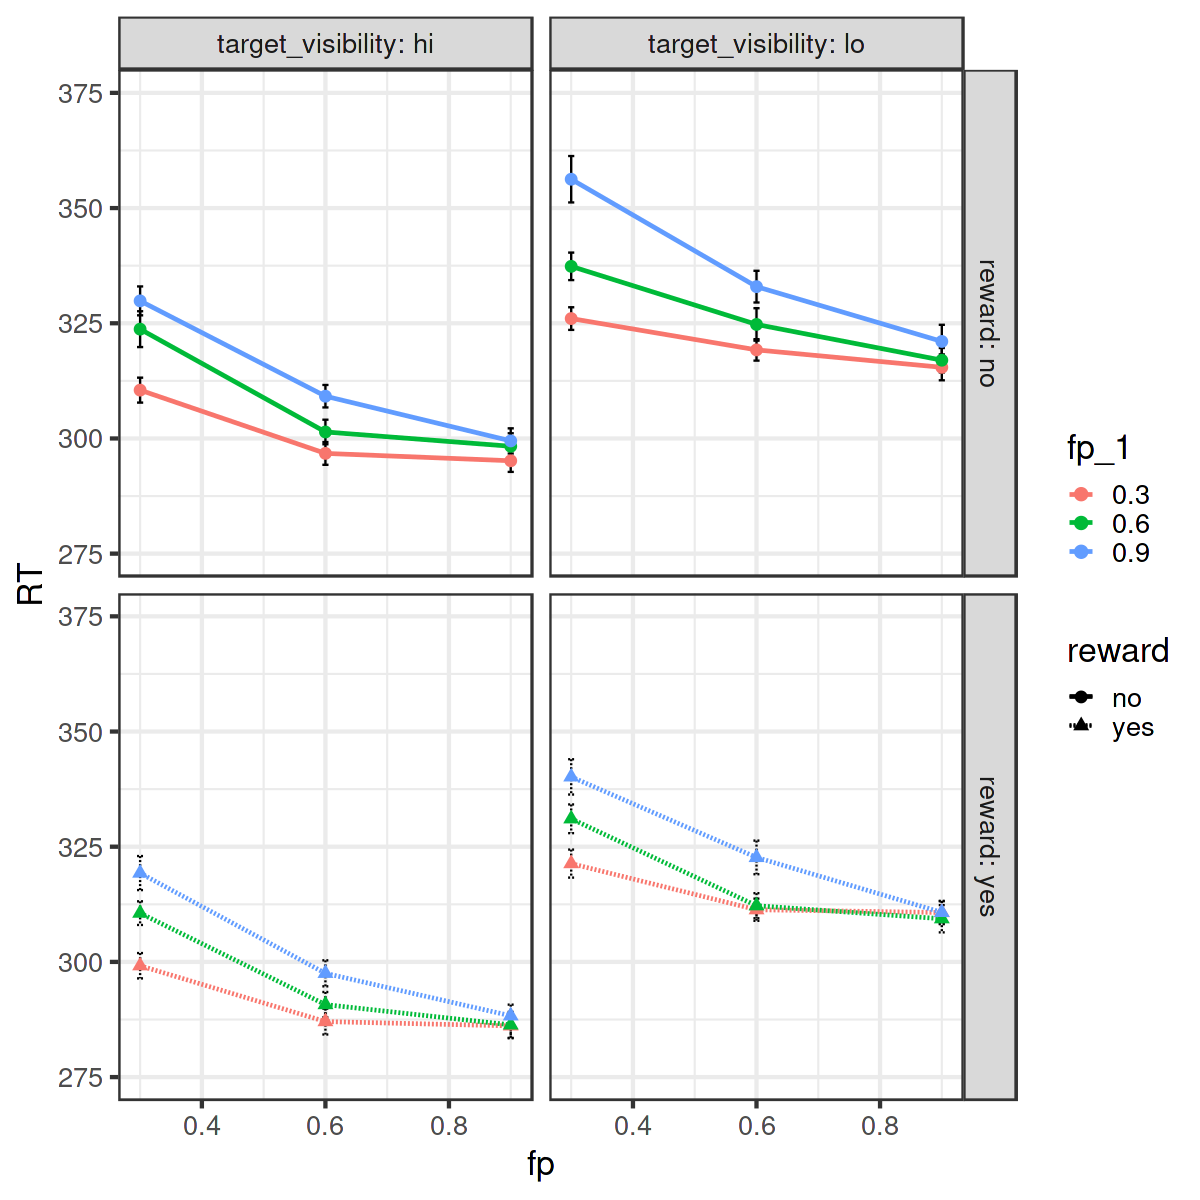

In [38]:
#### Plot and analyze the effect of FP(n-1) X FP X reward X visibility
# let's get some grand averages:
gave <- all_dat  %>% filter(exp_completed==TRUE)  %>% 
	filter(correct=='yes',practice=='no',outlier=='no')  %>% 
	group_by(sub_id, fp, fp_1, reward, target_visibility)  %>% 
	summarize(RT = mean(response_time))  %>% 
	mutate(fp_1 =as.factor(fp_1))  %>% 
	plottab(gv=c('fp','fp_1','reward','target_visibility'), dv='RT', group='sub_id') 
print(gave)

gave %>% ggplot(aes(x=fp, y=RT, color=fp_1,linetype=reward,shape=reward)) + 
		geom_errorbar(aes(ymin=lower,ymax=upper), color='black',size=.5, width=.01) + 
		geom_line(size=1) + 
		geom_point(size=3) + 
		facet_grid(reward~target_visibility,labeller='label_both') + 
		theme_bw(base_size=20) + 
		ylim(275, 375) -> plot_IV

fig(10,10)
plot_IV


... The overall pattern is that there are sequential effects that are highly similar in all conditions; Regardless of the block type, you see a similar 'fanning' pattern in the plots. We can quantify this with the LMM analysis:

In [40]:

mod <- lmer(1/response_time ~ fp*reward*target_visibility*fp_1 + (1+fp|sub_id), data=dd)
summary(mod)
anova(mod)


Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 1/response_time ~ fp * reward * target_visibility * fp_1 + (1 +  
    fp | sub_id)
   Data: dd

REML criterion at convergence: -355329

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.0292 -0.5975  0.0128  0.6321  5.7029 

Random effects:
 Groups   Name        Variance  Std.Dev.  Corr 
 sub_id   (Intercept) 1.390e-07 0.0003728      
          fp          3.574e-08 0.0001890 -0.10
 Residual             1.650e-07 0.0004063      
Number of obs: 27865, groups:  sub_id, 59

Fixed effects:
                                        Estimate Std. Error         df t value
(Intercept)                            3.395e-03  5.954e-05  1.269e+02  57.012
fp                                     1.634e-04  5.835e-05  1.312e+03   2.800
rewardyes                              1.251e-04  4.884e-05  2.774e+04   2.561
target_visibilitylo                   -1.175e-04  4.894e-05  2.774e+04  -2.401
fp_1  

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
fp,1.243579e-06,1.243579e-06,1,200.1574,7.534601e+00,6.603196e-03
reward,6.150018e-07,6.150018e-07,1,27741.5028,3.726175e+00,5.357610e-02
target_visibility,4.272262e-06,4.272262e-06,1,27743.3280,2.588480e+01,3.647732e-07
fp_1,5.609602e-05,5.609602e-05,1,27743.8136,3.398748e+02,1.919494e-75
fp:reward,2.157506e-09,2.157506e-09,1,27740.5164,1.307191e-02,9.089751e-01
fp:target_visibility,3.836089e-07,3.836089e-07,1,27741.7794,2.324211e+00,1.273862e-01
reward:target_visibility,4.706977e-07,4.706977e-07,1,27739.9823,2.851865e+00,9.127926e-02
fp:fp_1,2.304744e-05,2.304744e-05,1,27743.3150,1.396399e+02,3.811502e-32
reward:fp_1,1.164368e-07,1.164368e-07,1,27742.3230,7.054678e-01,4.009597e-01


The results of the analysis can be summarized as follows:
 * Just as before, we find significant main effects of fp, reward, and target visibility
 * The new findings are that there are main effects of fp_1, and the fp:fp_1 interaction. This is the typical sequential effect, as modeled in HW2
 * None of the other terms are significant, _but_ there is a trend for the term reward:target_visibility:fp_1 .  This suggests that sequential effects might be a bit larger for trials of this type. This intuition is corroborated by the plot, and so you are free to build a model that focuses on providing an explanation for this.
 

## V) The effects of memory, n-1 and further back

As highlighted in class, there are memory effects that go further back in time than jus the previous trial. Here, we investigate whether the contribution of trials further in the past differs for rewarded vs non-rewarded blocks.

Here, we will collapse across different levels of visibility.

First, let's make a plot of these 'higher order sequential effects'; the effect of fp on trial n-k for k = [1,2,3,4,5]

`summarise()` has grouped output by 'sub_id', 'fp', 'fp_k'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'sub_id', 'fp', 'fp_k'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'sub_id', 'fp', 'fp_k'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'sub_id', 'fp', 'fp_k'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'sub_id', 'fp', 'fp_k'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'group', 'fp', 'fp_k', 'k'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'fp', 'fp_k', 'k'. You can override using
the `.groups` argument.


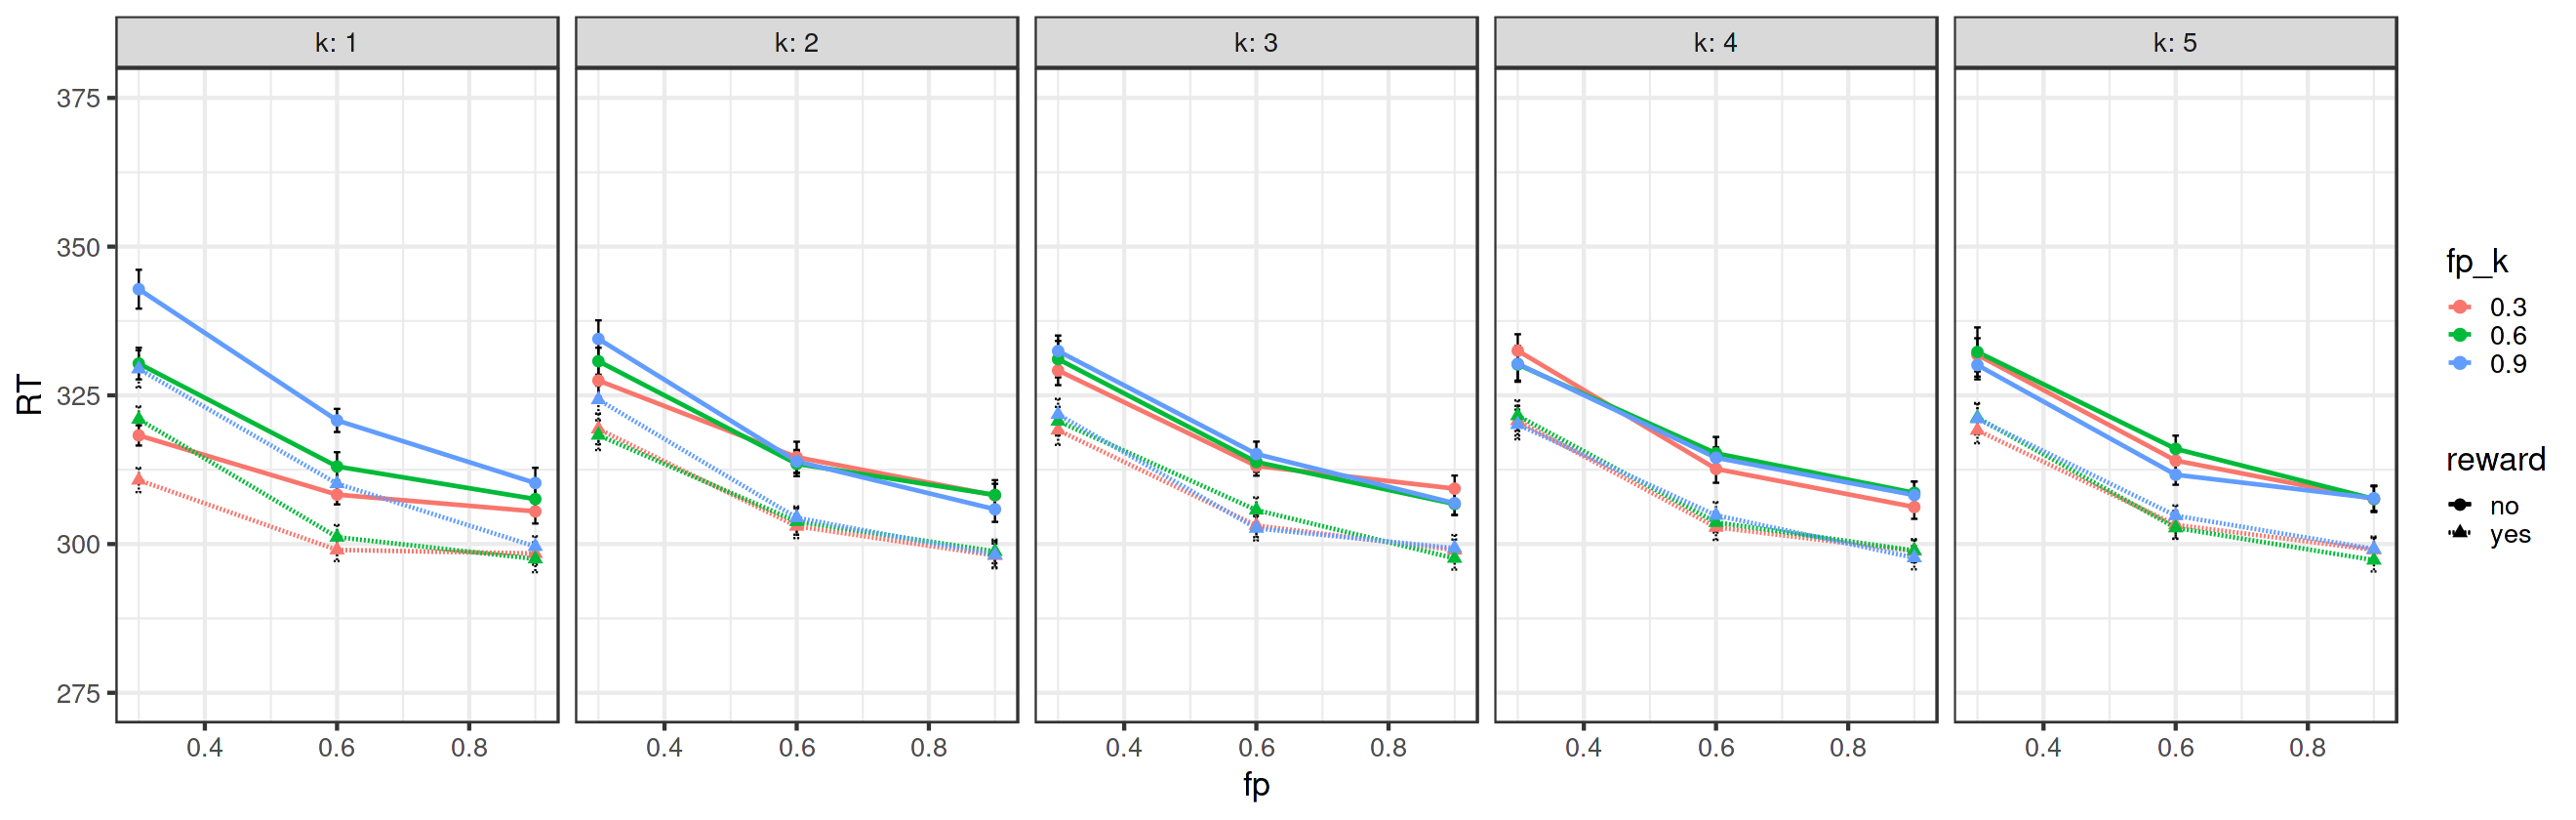

In [42]:
total_tab <- data.frame()

# get data, only in 'reward' blocks:
rd <- all_dat %>%  filter(exp_completed==TRUE)  %>% 
	filter(correct=='yes',practice=='no',outlier=='no',!is.na(fp_5))
for (k in seq(5)) {
	dd <- rd 
	rd[,'fp_k'] <- dd[,paste0('fp_',k)]
	sub_avetab <- rd  %>% group_by(sub_id,fp,fp_k,reward)  %>% 
		summarize(RT=mean(RT))  %>% 
		mutate(k=k)
	if(nrow(total_tab)==0){
		total_tab<-sub_avetab
	}else{
		total_tab %<>% rbind(sub_avetab)
	}
}

total_tab %>% 
	plottab(gv=c('fp','fp_k','k','reward'),dv='RT',group='sub_id')  %>% 
	mutate(fp_k=as.factor(fp_k))  %>% 
	ggplot(aes(x=fp, y=RT, color=fp_k,linetype=reward,shape=reward)) + 
		geom_errorbar(aes(ymin=lower,ymax=upper), color='black',size=.5, width=.01) + 
		geom_line(size=1) + 
		geom_point(size=3) + 
		facet_grid(.~k, labeller='label_both') + 
		theme_bw(base_size=20) + 
		ylim(275, 375) -> plot_Va

fig(22,7)
plot_Va


the take-away from this plot is that:
* Both rewarded and non-rewarded trials show the typical sequential effects for trial n-1 (see HW2)
* At k=2, this effect is still visible, to a lesser extent. Of note here is that the fanning-pattern is more pronounced for the non-reward blocks. For the rewarded blocks, the three lines are more or less identical.
* A similar difference is visible at k=3, although it already becomes much harder to see here. 
* from k=4 onwards, it doesn't seem like there are clear sequential effects in this experiment.


We can also visualize this 'decay' in sequential effects in a different way, namely by fitting a large mixed-effects model that predicts 1/RT as a function of the series of past FPs. Here, we will do this for the past FPs up to k=3:



,coefficient,coeff_type,k,reward
,<dbl>,<chr>,<int>,<chr>
fp_1,-4.747157e-04,main,1,yes
fp_2,-1.403713e-04,main,2,yes
fp_3,-4.397964e-05,main,3,yes
fp:fp_1,4.929194e-04,inter,1,yes
fp:fp_2,1.561361e-04,inter,2,yes
fp:fp_3,4.508895e-05,inter,3,yes
fp_11,-5.253067e-04,main,1,no
fp_21,-1.700740e-04,main,2,no
fp_31,-1.174554e-04,main,3,no


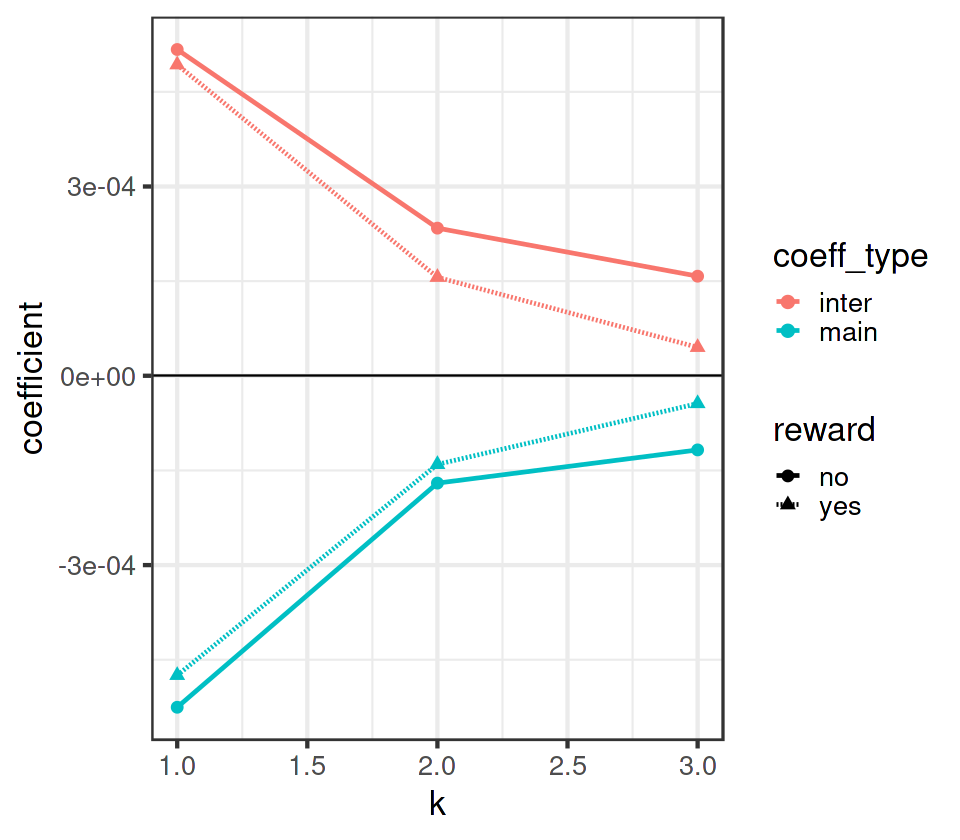

In [45]:
## Again, filter the data; note that we exclude trials that have no (n-3):
dd <- all_dat  %>% filter(exp_completed==TRUE)  %>% 
	filter(correct=='yes',practice=='no',outlier=='no',!is.na(fp_3))

### Fit two models: one on the rewarded, and one on the non-rewarded data:
mod<- lmer(1/response_time 	~	fp*fp_1 + 
					fp_2+ fp:fp_2 + 
					fp_3+ fp:fp_3 + 
					(1|sub_id), data = dd  %>% filter(reward=='yes'), na.action='na.fail')
mod2<- lmer(1/response_time 	~	fp*fp_1 + 
					fp_2+ fp:fp_2 + 
					fp_3+ fp:fp_3 + 
					(1|sub_id), data = dd  %>% filter(reward=='no'), na.action='na.fail')

# Take the fixed effects terms of the model, and put them in a dataframe:
dd <- fixef(mod)  %>% data.frame 
names(dd) <- c('coefficient')
dd$coeff_type = c('b0','fp', rep('main',3),rep('inter',3))
dd  %<>% filter(coeff_type %in% c('main','inter'))
dd$k = rep(seq(3),2)
dd$reward='yes'
coefftab <- dd 

dd <- fixef(mod2)  %>% data.frame 
names(dd) <- c('coefficient')
dd$coeff_type = c('b0','fp', rep('main',3),rep('inter',3))
dd  %<>% filter(coeff_type %in% c('main','inter'))
dd$k = rep(seq(3),2)
dd$reward='no'
coefftab  %<>% rbind(dd)

# print the table with these coefficients:
coefftab

# now plot it:
coefftab %>% 
	ggplot(aes(x=k, y=coefficient, color=coeff_type, linetype=reward,shape=reward)) + 
		geom_hline(yintercept=0.0) +
		geom_line(size=1) + 
		geom_point(size=3) + 
		theme_bw(base_size=20) -> plot_Vb

fig(8,7)
plot_Vb
